In [1]:
import requests as rq
import numpy as np

In [2]:
rquest = rq.get('http://0.0.0.0:32/graph')
json_graph = rquest.json()
json_graph

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=32): Max retries exceeded with url: /graph (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f28d01dcb10>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [3]:
import networkx as nx
import json

# json to networkx object
graph = nx.json_graph.node_link_graph(json_graph)

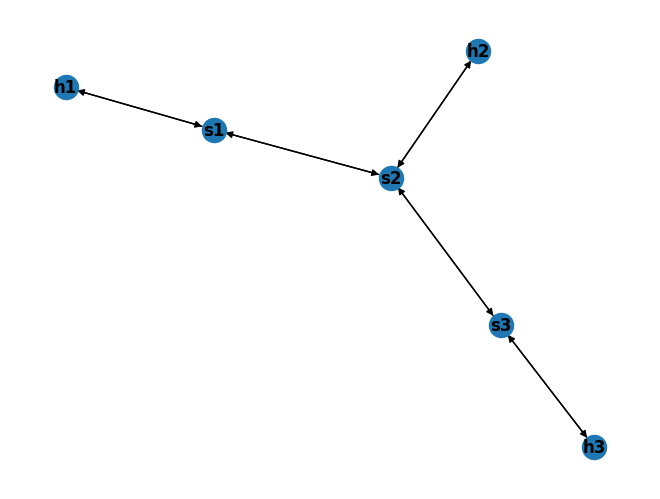

In [5]:
# plot graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [28]:
# number of nodes and edges
print('Number of nodes: ', graph.number_of_nodes())
print('Number of edges: ', graph.number_of_edges())
# adjacent matrix
print('Adjacent matrix: ', nx.adjacency_matrix(graph).todense())

Number of nodes:  3
Number of edges:  7
Adjacent matrix:  [[0 1 0]
 [1 0 1]
 [0 1 0]]


In [34]:
# adjacency matrix of graph
adjacency_matrix = nx.adjacency_matrix(graph).todense()
adjacency_matrix

matrix([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]])

In [50]:
number_node = graph.number_of_nodes()
bin_matrix = nx.adjacency_matrix(graph).todense().tolist()
adj_matrix = [[] for i in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

[[], [2], [1, 3], [2]]


In [80]:
# get atrributes of link of nodes
def update_state():
    infor_edges = list(graph.edges(data=True))
    predict_delay =np.zeros((number_node+1, number_node+1))
    predict_packet_loss = np.zeros((number_node+1, number_node+1))
    predict_bandwidth = np.zeros((number_node+1, number_node+1))
    for i in range(len(infor_edges)):
        src = infor_edges[i][0]
        dst = infor_edges[i][1]
        predict_delay[src][dst] = infor_edges[i][2]['delay']
        predict_packet_loss[src][dst] = infor_edges[i][2]['packet_loss']
    return predict_delay, predict_packet_loss, predict_bandwidth

predict_delay:  [[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.00074029]
 [0.         0.         0.00074029 0.        ]]


In [18]:
import requests as rq
import json

sw_list = rq.get('http://0.0.0.0:8080/switches').json()
host_list = rq.get('http://0.0.0.0:8080/hosts').json()


hw_addrs = []
hw_addrs = [port['hw_addr'] for switch in sw_list['switch'] for port in switch['ports']]

# for host in host_list['hosts']:
#     if host['mac'] in hw_addrs:
#         # remove host that contain mac in hw_addrs
host_list['hosts'] = [host for host in host_list['hosts'] if host['mac'] not in hw_addrs]
host_list

{'hosts': [{'mac': '00:00:00:00:00:02',
   'ipv4': [],
   'ipv6': ['fe80::200:ff:fe00:2'],
   'port': {'dpid': '0000000000000002',
    'port_no': '00000001',
    'hw_addr': '6a:10:10:79:25:51',
    'name': 's2-eth1'}},
  {'mac': '00:00:00:00:00:03',
   'ipv4': [],
   'ipv6': ['fe80::200:ff:fe00:3'],
   'port': {'dpid': '0000000000000003',
    'port_no': '00000001',
    'hw_addr': '26:76:32:2e:52:69',
    'name': 's3-eth1'}},
  {'mac': '00:00:00:00:00:01',
   'ipv4': [],
   'ipv6': ['fe80::200:ff:fe00:1'],
   'port': {'dpid': '0000000000000001',
    'port_no': '00000001',
    'hw_addr': '6a:85:24:57:39:8c',
    'name': 's1-eth1'}},
  {'mac': '00:00:00:00:00:04',
   'ipv4': [],
   'ipv6': ['fe80::200:ff:fe00:4'],
   'port': {'dpid': '0000000000000004',
    'port_no': '00000001',
    'hw_addr': 'b2:94:36:04:06:7a',
    'name': 's4-eth1'}}]}

In [ ]:
[
    {
    'src_host': 1,
    'dst_host': 2,
    'dpid_path': [1, 2, 3]
    },
    {
    'src_host': 1,
    'dst_host': 2,
    'dpid_path': [1, 2, 3]
    },
 ]